### Task 4 - combining RNA and ADT

In [32]:
import numpy as np
import pandas as pd
import scanpy as sc

In [33]:
import muon as mu
from muon import prot as pt

In [34]:
rna_adata = sc.read('task3_coarse.h5ad')

In [35]:
prot_adata = sc.read('task4_adt_preprocessed.h5ad')

In [36]:
mdata = mu.MuData({"rna": rna_adata, "prot": prot_adata})

### Take intersection

In [37]:
mu.pp.intersect_obs(mdata)

### Run WNN

In [38]:
sc.pp.neighbors(mdata['rna'])
sc.pp.neighbors(mdata['prot'])

# Calculate weighted nearest neighbors
mu.pp.neighbors(mdata, key_added='wnn', low_memory=True, n_multineighbors=50)

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/pynndescent/pynndescent_.py:346: NumbaWarning: Cannot cache compiled function "init_rp_tree" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_rp_tree(data, dist, current_graph, leaf_array)
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/pynndescent/pynndescent_.py:348: NumbaWarning: Cannot cache compiled function "init_random" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  init_random(n_neighbors, data, current_graph, dist, rng_state)
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/pynndescent/pynndescent_.py:358: NumbaWarning: Cannot cache compiled function "process_candidates" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  nn_descent_internal_low_memory_parallel(
/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/pynndescent/pynndescent_.py:346: Nu

### Run UMAP

In [39]:
mu.tl.umap(mdata, neighbors_key='wnn', random_state=10)


### Plot and save UMAPs

/home/ssm-user/miniconda3/envs/single_cell/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


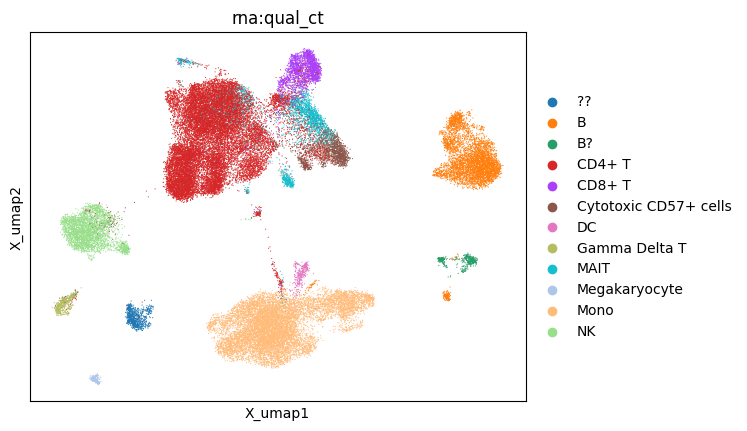

In [40]:
mu.pl.umap(mdata, color='rna:qual_ct', save='task4_WNN_UMAP.png')

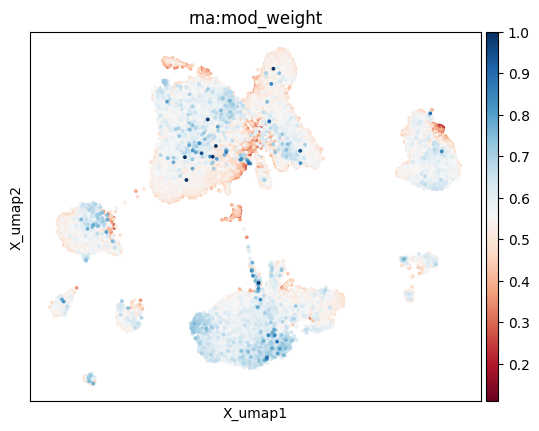

In [30]:
mu.pl.umap(mdata, color=['rna:mod_weight'], cmap='RdBu', s=30, save='task4_RNA_weights.png')

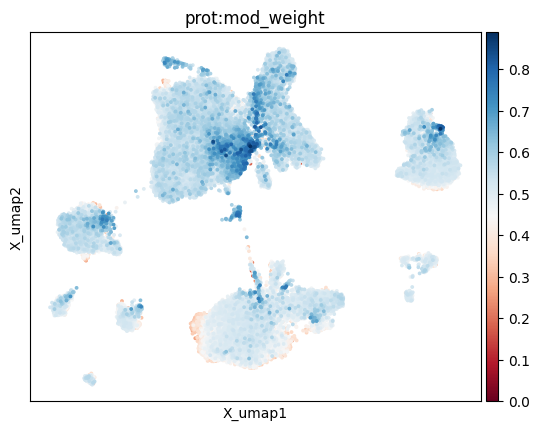

In [31]:
mu.pl.umap(mdata, color=['prot:mod_weight'], cmap='RdBu', s=30, save='task4_ADT_weights.png')